#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape
# rows = 303, cols=14

(303, 14)

### Data Preprocessing

#### 1) Handle Null Values

In [4]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

#### 2) Handle Duplicates

In [5]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

#### 3) Check data type

In [8]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [10]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

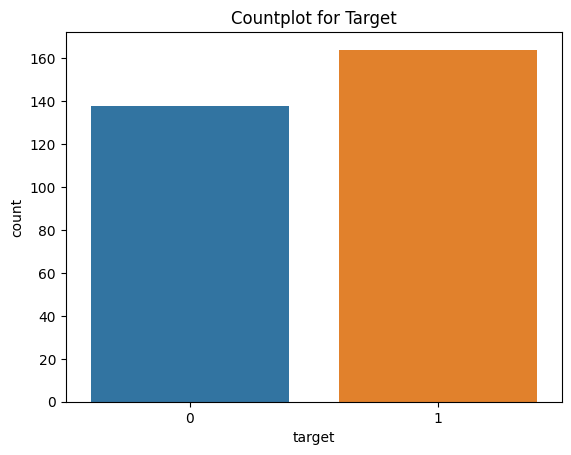

In [12]:
sns.countplot(x=df['target'])
plt.title('Countplot for Target')
plt.show()

### EDA

In [16]:
# df['rest_ecg'].value_counts()
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
cont_cols = ['age','rest_bps','cholestrol','thalach','old_peak']

In [18]:
df.groupby(['target'])[['age','rest_bps','cholestrol',
                        'thalach','old_peak']].agg(['mean','min','max'])

age            rest_bps            cholestrol            \
             mean min max        mean  min  max        mean  min  max   
target                                                                  
0       56.601449  35  77  134.398551  100  200  251.086957  131  409   
1       52.585366  29  76  129.250000   94  180  242.640244  126  564   

           thalach           old_peak            
              mean min  max      mean  min  max  
target                                           
0       139.101449  71  195  1.585507  0.0  6.2  
1       158.378049  96  202  0.586585  0.0  4.2

In [19]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [31]:
sns.set_style('darkgrid')

In [37]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

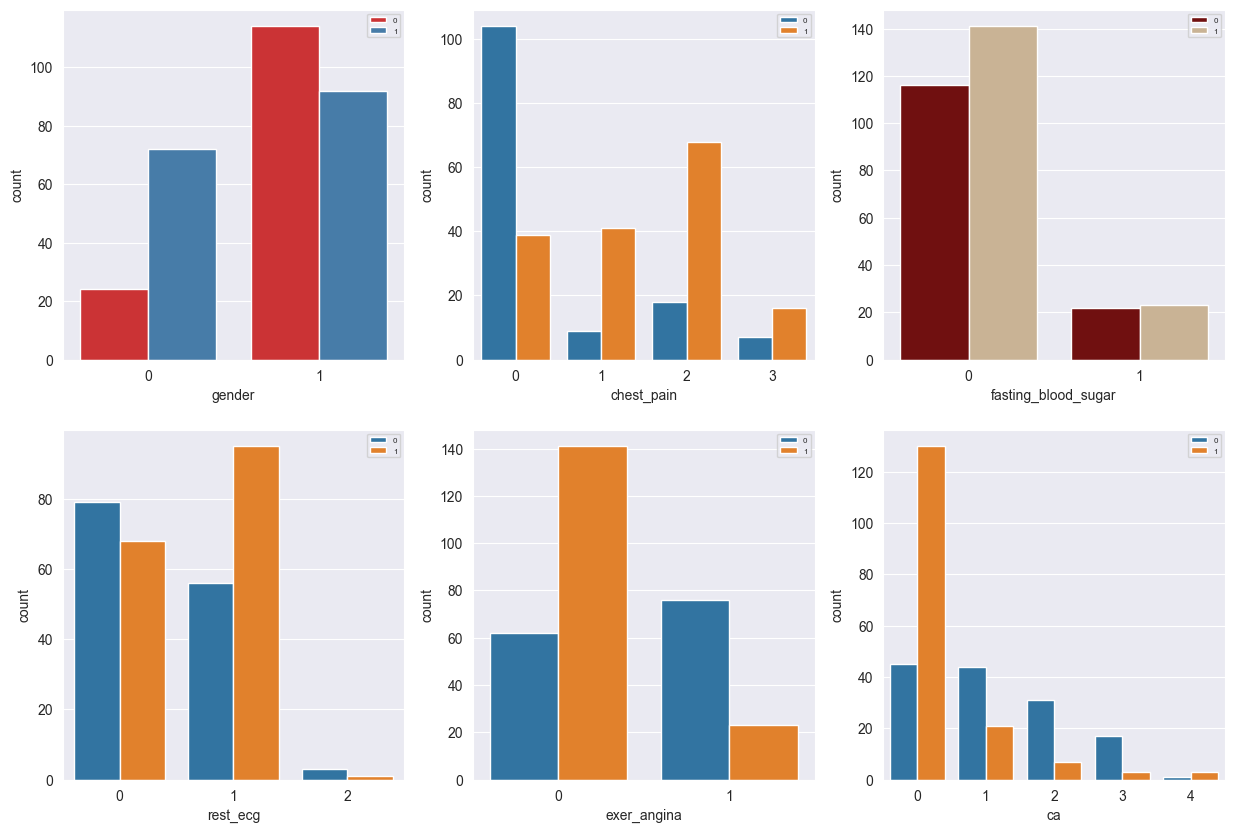

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x=df['gender'],hue=df['target'],palette='Set1')
plt.legend(fontsize='xx-small')

plt.subplot(2,3,2)
sns.countplot(x=df['chest_pain'],hue=df['target'])
plt.legend(fontsize='xx-small')

plt.subplot(2,3,3)
sns.countplot(x=df['fasting_blood_sugar'],hue=df['target'],palette=['maroon','tan'])
plt.legend(fontsize='xx-small')

plt.subplot(2,3,4)
sns.countplot(x=df['rest_ecg'],hue=df['target'])
plt.legend(fontsize='xx-small')

plt.subplot(2,3,5)
sns.countplot(x=df['exer_angina'],hue=df['target'])
plt.legend(fontsize='xx-small')

plt.subplot(2,3,6)
sns.countplot(x=df['ca'],hue=df['target'])
plt.legend(fontsize='xx-small')

plt.show()

#### Inferences
1) Patients with ca=0 are more prone to heart disease.<br>
2) Patients with chest_pain=0 are less prone to heart disease.<br>
3) Patients with rest_ecg=1 are more prone to heart disease.<br>
4) Patients with exer_angina=0 are more prone to heart disease.

In [38]:
print(cont_cols)

['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']


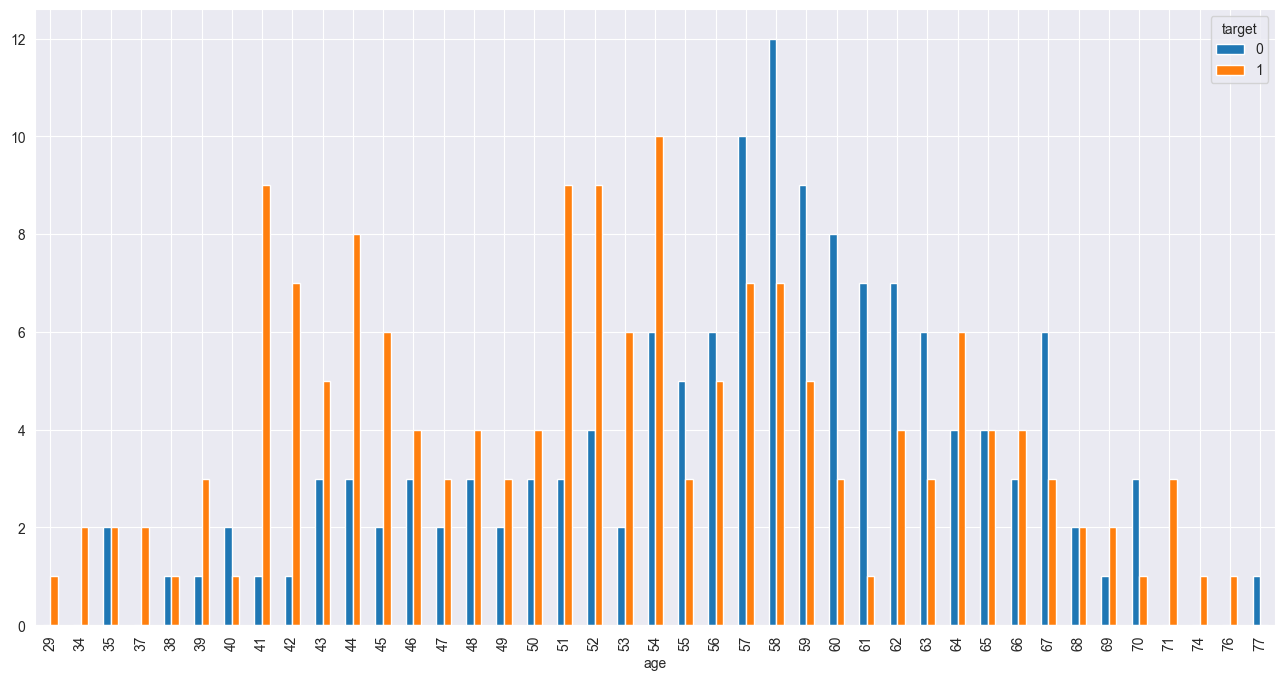

In [43]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(16,8))
plt.show()

In [44]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
df['age_grp'] = pd.cut(df['age'],bins=list(range(25,85,5)))
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target,age_grp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 65]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(35, 40]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 45]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(55, 60]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(55, 60]"


In [57]:
pt1 = pd.pivot_table(data=df, index=['age_grp'],columns = ['target'],values=['cholestrol'])
                    # aggfunc=['min','max','mean'])
pt1
# default aggregate function used is mean 
# age group and target wise mean of cholestrol

cholestrol            
target             0           1
age_grp                         
(25, 30]         NaN  204.000000
(30, 35]  240.000000  191.750000
(35, 40]  210.000000  225.571429
(40, 45]  248.100000  233.371429
(45, 50]  237.000000  236.166667
(50, 55]  257.350000  245.675676
(55, 60]  253.000000  237.703704
(60, 65]  258.678571  268.333333
(65, 70]  245.933333  275.333333
(70, 75]         NaN  246.250000
(75, 80]  304.000000  197.000000

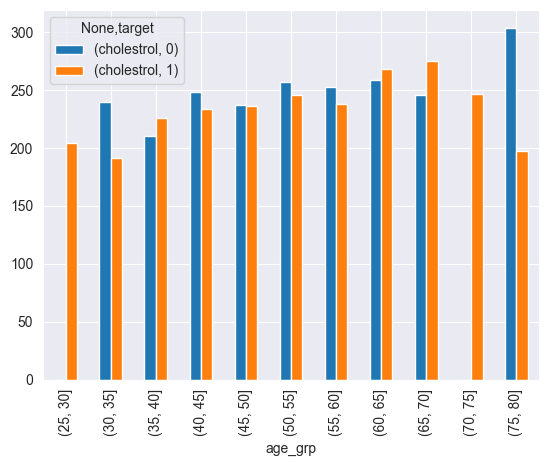

In [58]:
pt1.plot(kind='bar')
plt.show()

In [53]:
df[df['age'].between(70,75)]

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target,age_grp
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,"(70, 75]"
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,"(70, 75]"
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,"(70, 75]"
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,"(65, 70]"
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,"(70, 75]"
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(65, 70]"
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,"(65, 70]"
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,"(65, 70]"


In [59]:
print(cont_cols)

['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']


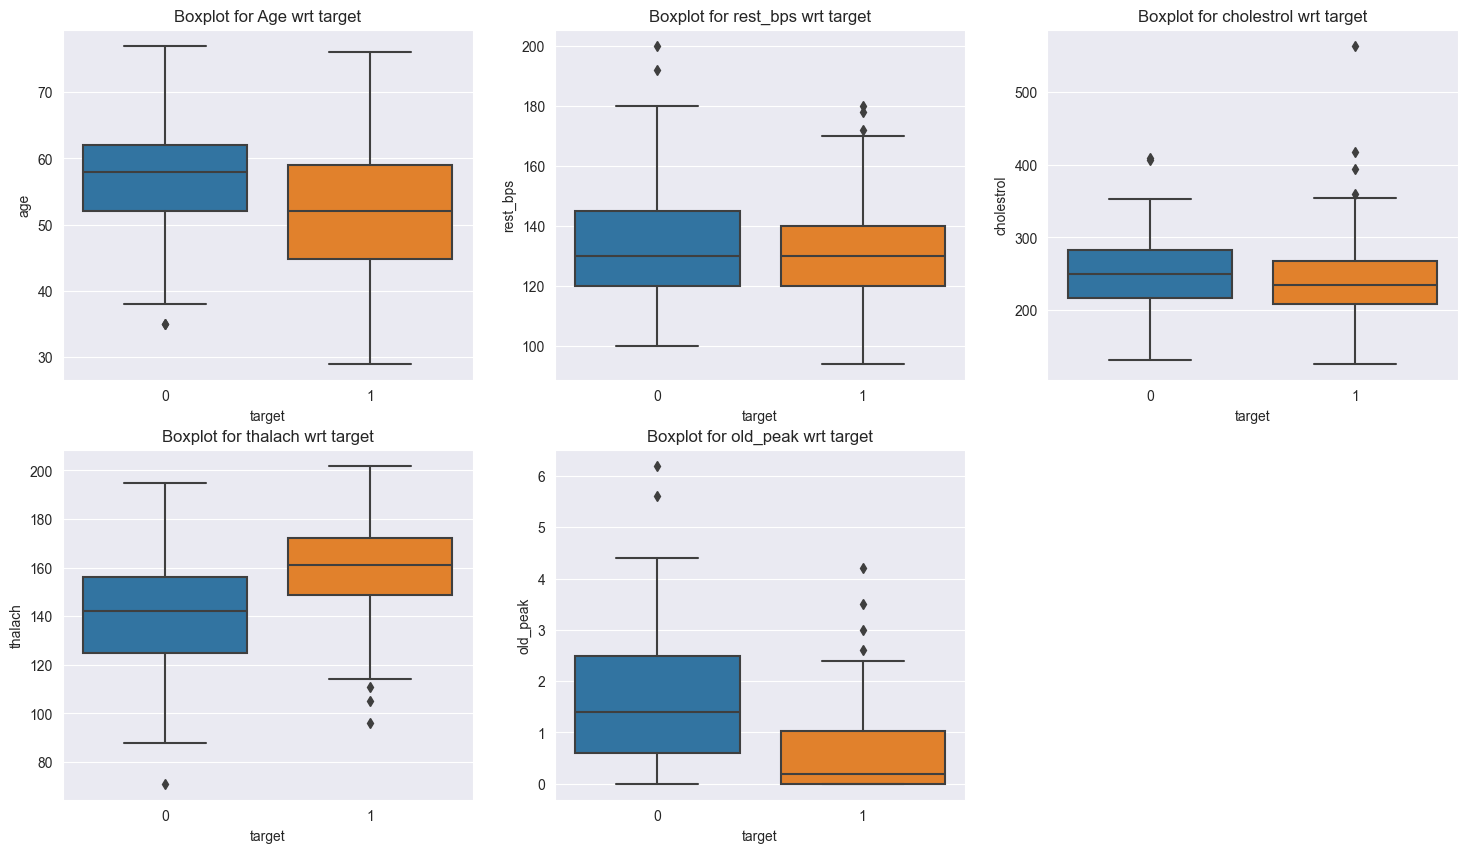

In [62]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.boxplot(x=df['target'],y=df['age'])
plt.title('Boxplot for Age wrt target')

plt.subplot(2,3,2)
sns.boxplot(x=df['target'],y=df['rest_bps'])
plt.title('Boxplot for rest_bps wrt target')

plt.subplot(2,3,3)
sns.boxplot(x=df['target'],y=df['cholestrol'])
plt.title('Boxplot for cholestrol wrt target')

plt.subplot(2,3,4)
sns.boxplot(x=df['target'],y=df['thalach'])
plt.title('Boxplot for thalach wrt target')

plt.subplot(2,3,5)
sns.boxplot(x=df['target'],y=df['old_peak'])
plt.title('Boxplot for old_peak wrt target')

plt.show()

#### Correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_13524\250840164.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


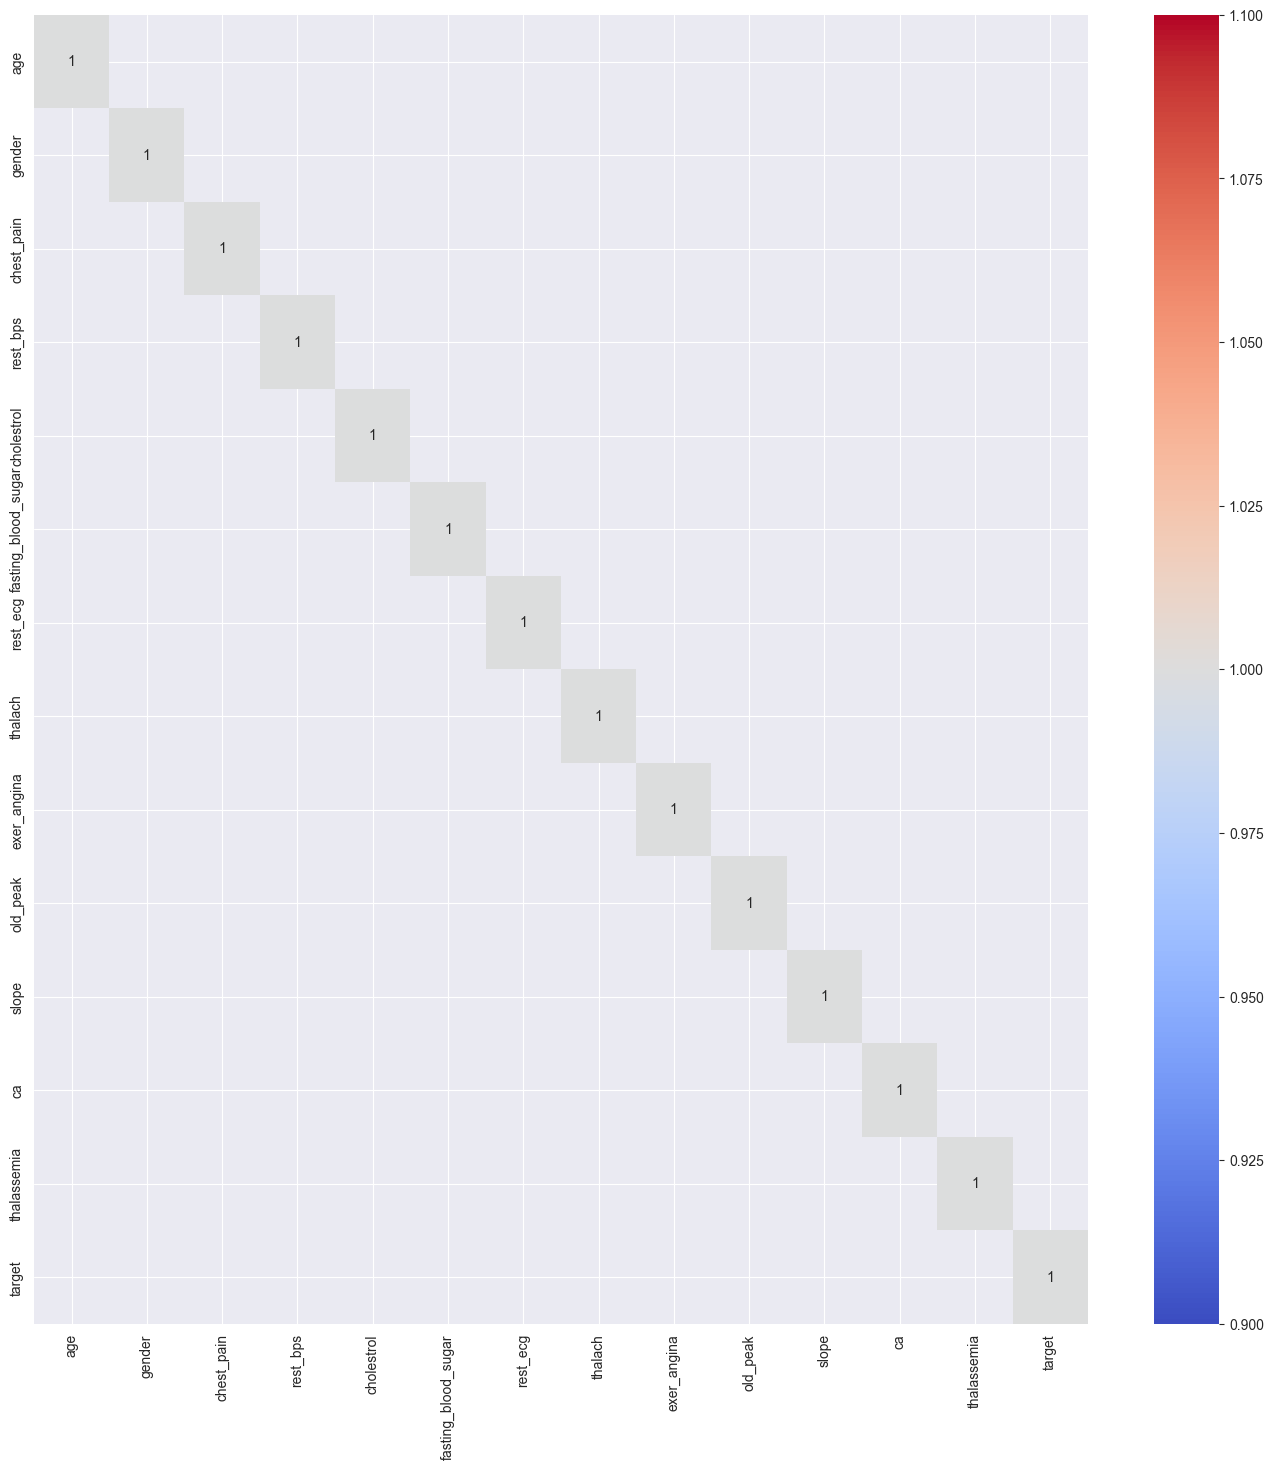

In [72]:
corr = df.corr()

plt.figure(figsize=((17,17)))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

#### Infernce
1) Highly correlated features are not present

#### Outlier Treatment

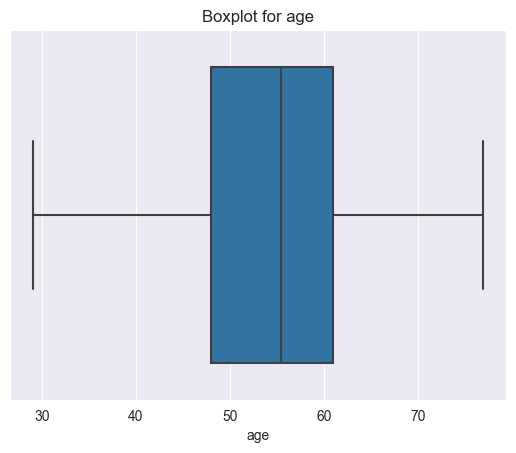

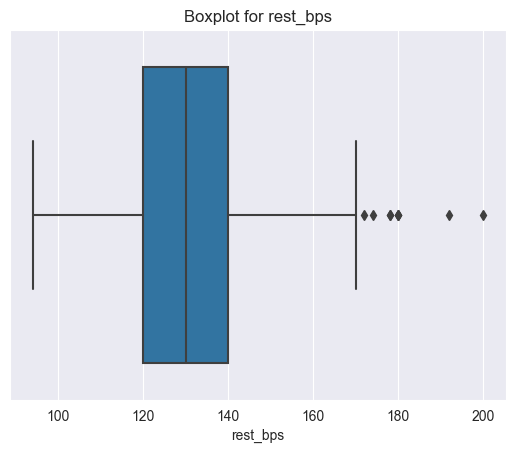

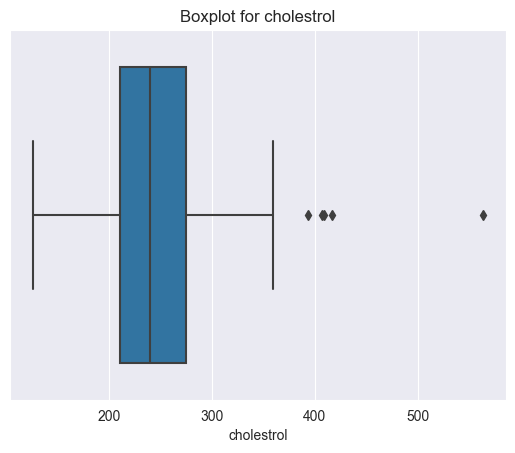

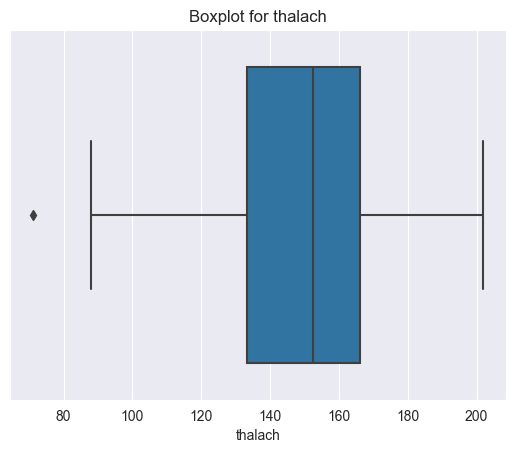

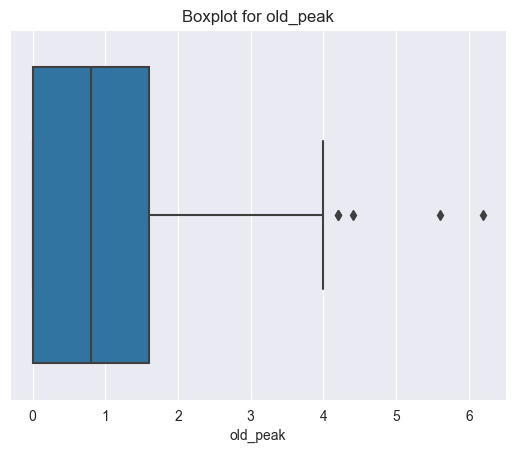

In [75]:
for i in cont_cols:
    sns.boxplot(x =df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [74]:
df[cont_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,302.0,54.420530,9.047970,29.0,35.00,35.04,38.00,40.00,55.5,68.00,69.97,70.00,71.00,77.0
rest_bps,302.0,131.602649,17.563394,94.0,100.00,101.02,104.03,108.00,130.0,160.00,170.00,177.92,180.00,200.0
cholestrol,302.0,246.500000,51.753489,126.0,149.00,160.08,167.03,175.05,240.5,326.95,340.97,353.98,406.87,564.0
thalach,302.0,149.569536,22.903527,71.0,95.01,97.04,103.06,108.05,152.5,181.95,184.97,186.98,191.98,202.0
old_peak,302.0,1.043046,1.161452,0.0,0.00,0.00,0.00,0.00,0.8,3.40,3.60,4.00,4.20,6.2


In [76]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [77]:
df1 = df.copy()

In [78]:
df[cont_cols] = df[cont_cols].apply(outlier_treatment)

#### Select x (independent) and y(dependent)

In [80]:
x = df.drop(['target','age_grp'],axis=1)
y = df['target']
print(type(x),type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(302, 13)
(302,)


In [81]:
x.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia'],
      dtype='object')

#### Split the data

In [82]:
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


#### Model Building

In [134]:
from sklearn.metrics import confusion_matrix,classification_report, precision_score
from sklearn.metrics import recall_score,accuracy_score,plot_confusion_matrix

In [135]:
sns.set_style('white')

In [137]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(classification_report(ytest,ypred))
#     plot_confusion_matrix(model,x_test,ytest)
    sns.heatmap(cm,annot=True)
    plt.show()
    
# tabulate_model_performance
def tmp(x_train,x_test, y_train,y_test,ypred,model,modelname=None):
    eval_model(y_test,ypred)
    train_acc_sc = model.score(x_train,y_train)
    test_acc_sc = model.score(x_test,y_test)
    pre_sc = precision_score(y_test,ypred)  # Pre1
    rec_sc = recall_score(y_test,ypred)  # Rec1
    res = pd.DataFrame({'Train_Acc':train_acc_sc,'Test_Acc':test_acc_sc,
                        'Precision':pre_sc,'Recall':rec_sc},index=[modelname])
    return res

#### Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [139]:
dt1 = DecisionTreeClassifier(criterion='gini',random_state=25)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=25)

In [140]:
print('Train Score',dt1.score(x_train,y_train))
print('Test Score',dt1.score(x_test,y_test)) # highly overfit

Train Score 1.0
Test Score 0.8131868131868132


In [142]:
ypred_dt1 = dt1.predict(x_test)
# eval_model(y_test,ypred_dt1,dt1)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        36
           1       0.87      0.82      0.84        55

    accuracy                           0.81        91
   macro avg       0.80      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



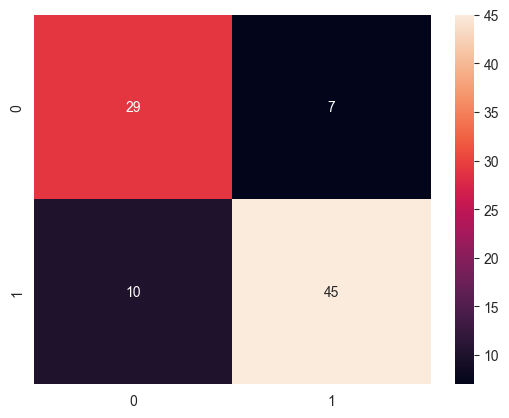

,Train_Acc,Test_Acc,Precision,Recall
DT1(gini),1.0,0.813187,0.865385,0.818182


In [143]:
dt1_df = tmp(x_train,x_test, y_train,y_test,ypred_dt1,dt1,'DT1(gini)')
dt1_df

In [130]:
fn = x_train.columns
cn = ['0','1']

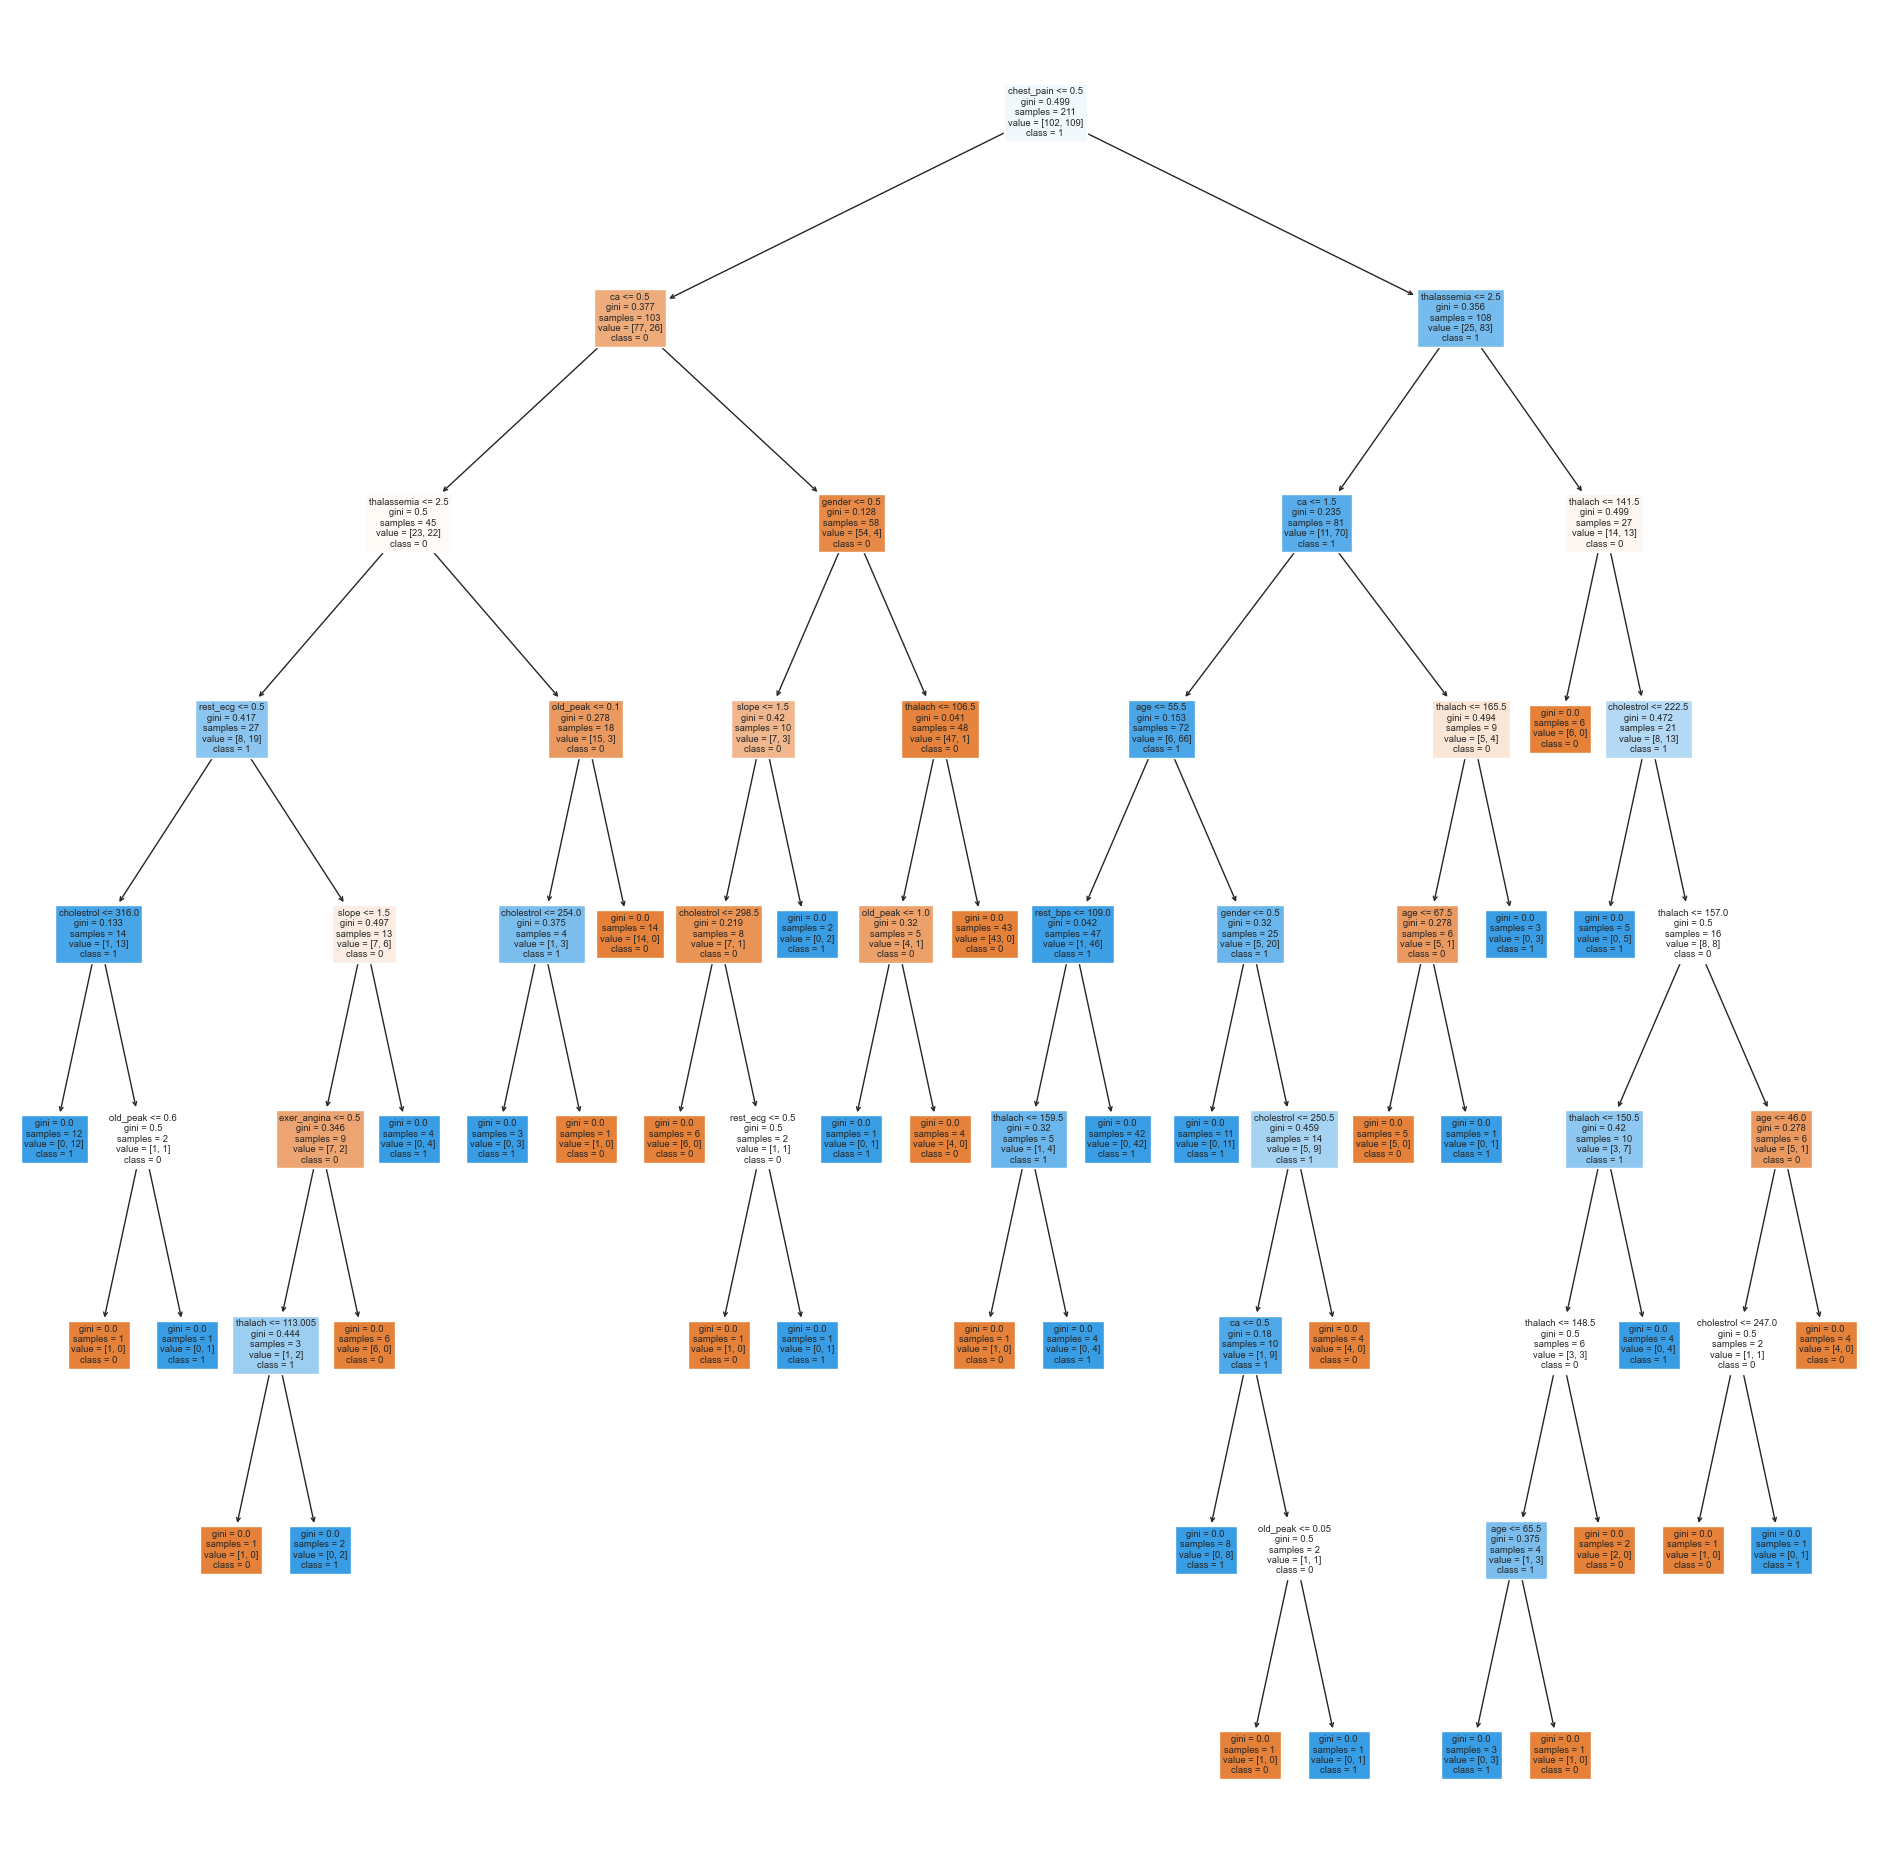

In [132]:
plt.figure(figsize=(24,24))
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

#### Decision Tree Model - 2

In [150]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=10,
                             random_state=25)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10,
                       random_state=25)

              precision    recall  f1-score   support

           0       0.71      0.81      0.75        36
           1       0.86      0.78      0.82        55

    accuracy                           0.79        91
   macro avg       0.78      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



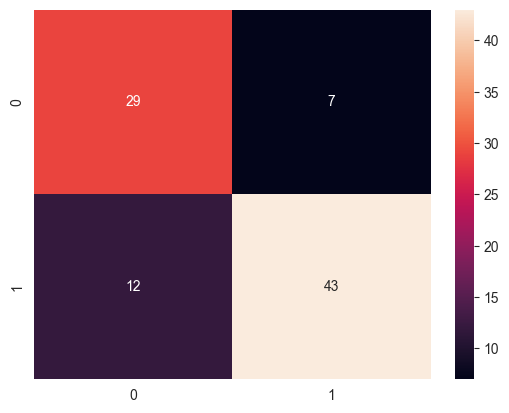

,Train_Acc,Test_Acc,Precision,Recall
"DT2(entropy,MD=6,MSS=15)",0.924171,0.791209,0.86,0.781818


In [151]:
ypred_dt2 = dt2.predict(x_test)
dt2_df = tmp(x_train,x_test,y_train,y_test,ypred_dt2,dt2,'DT2(entropy,MD=6,MSS=15)')
dt2_df

### How to decide the best paramters - Hyperparameter Tuning

### 1) GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV  # CV = Cross Validation

In [153]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8],
             'min_samples_split':[8,10,12,15]}

In [171]:
dt = DecisionTreeClassifier()
gs1 = GridSearchCV(estimator=dt,param_grid=hparams_dt,cv=5,scoring='accuracy')
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15]},
             scoring='accuracy')

In [172]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)
0.7627906976744186


In [181]:
gs1_res = pd.DataFrame(gs1.cv_results_)
print(gs1_res.shape)
gs1_res.head()

(40, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025385,0.008863,0.024788,0.008925,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.690476,0.666667,0.642857,0.734219,0.085196,36
1,0.031583,0.018095,0.017694,0.007366,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.714286,0.738095,0.642857,0.753267,0.075383,11
2,0.022719,0.010193,0.013994,0.006415,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.690476,0.690476,0.642857,0.738981,0.081888,32
3,0.015192,0.002207,0.009649,0.002159,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.813953,0.857143,0.666667,0.714286,0.642857,0.738981,0.083261,29
4,0.018442,0.004235,0.015791,0.004441,gini,5,8,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.790698,0.833333,0.738095,0.690476,0.690476,0.748616,0.056248,14


In [174]:
gs1_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [175]:
gs1_res[['param_criterion', 'param_max_depth', 
         'param_min_samples_split','mean_test_score',
         'rank_test_score']].sort_values('mean_test_score',ascending=False).head()


,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
25,entropy,5,10,0.762791,1
34,entropy,7,12,0.762680,2
36,entropy,8,8,0.758250,3
21,entropy,4,10,0.757918,4
38,entropy,8,12,0.757918,5


### DT Model based on results obtained from GrdiSearchCV

In [176]:
dt3 = DecisionTreeClassifier(**gs1.best_params_)
dt3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

              precision    recall  f1-score   support

           0       0.71      0.81      0.75        36
           1       0.86      0.78      0.82        55

    accuracy                           0.79        91
   macro avg       0.78      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



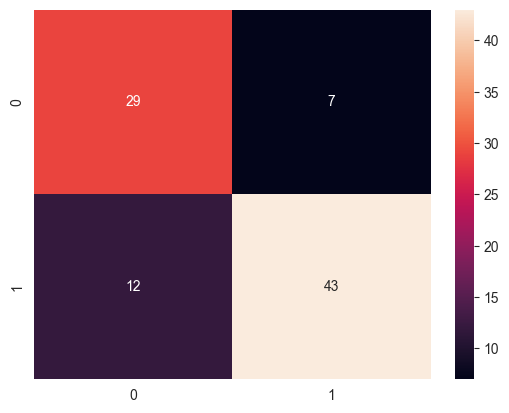

,Train_Acc,Test_Acc,Precision,Recall
"DT3_GSCV(entropy,MD=6,MSS=8)",0.924171,0.791209,0.86,0.781818


In [187]:
ypred_dt3 = dt3.predict(x_test)
dt3_df = tmp(x_train,x_test,y_train,y_test,ypred_dt3,dt3,'DT3_GSCV(entropy,MD=6,MSS=8)')
dt3_df

In [188]:
# combined_res = pd.concat([dt1_df,dt2_df,dt3_df])
# combined_res

### 2) Randomized SearchCV

In [182]:
from sklearn.model_selection import RandomizedSearchCV

In [197]:
dt = DecisionTreeClassifier()
rs1 = RandomizedSearchCV(estimator=dt,param_distributions=hparams_dt,scoring='accuracy',cv=5)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12, 15]},
                   scoring='accuracy')

In [198]:
print(rs1.best_params_)
print(rs1.best_estimator_)
print(rs1.best_score_)

{'min_samples_split': 12, 'max_depth': 6, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=12)
0.7579180509413067


In [199]:
rs1_res = pd.DataFrame(rs1.cv_results_)
print(rs1_res.shape)
rs1_res.head()

(10, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022986,0.008712,0.011994,0.002605,15,7,entropy,"{'min_samples_split': 15, 'max_depth': 7, 'cri...",0.837209,0.833333,0.666667,0.738095,0.642857,0.743632,0.081133,8
1,0.020987,0.003345,0.013993,0.004047,8,7,entropy,"{'min_samples_split': 8, 'max_depth': 7, 'crit...",0.790698,0.904762,0.714286,0.761905,0.595238,0.753378,0.100915,2
2,0.020609,0.005209,0.012592,0.003663,8,4,entropy,"{'min_samples_split': 8, 'max_depth': 4, 'crit...",0.813953,0.880952,0.690476,0.738095,0.642857,0.753267,0.085264,3
3,0.014394,0.002581,0.008200,0.001720,15,5,entropy,"{'min_samples_split': 15, 'max_depth': 5, 'cri...",0.837209,0.857143,0.666667,0.738095,0.642857,0.748394,0.086762,4
4,0.012765,0.001699,0.007601,0.000494,12,7,gini,"{'min_samples_split': 12, 'max_depth': 7, 'cri...",0.790698,0.809524,0.738095,0.714286,0.666667,0.743854,0.051715,7


In [200]:
rs1_res[['param_criterion', 'param_max_depth', 
         'param_min_samples_split','mean_test_score',
         'rank_test_score']].sort_values('mean_test_score',ascending=False).head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
9,entropy,6,12,0.757918,1
1,entropy,7,8,0.753378,2
2,entropy,4,8,0.753267,3
3,entropy,5,15,0.748394,4
6,gini,6,8,0.743965,5


In [201]:
dt4 = DecisionTreeClassifier(**rs1.best_params_)
dt4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=12)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        36
           1       0.86      0.80      0.83        55

    accuracy                           0.80        91
   macro avg       0.79      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



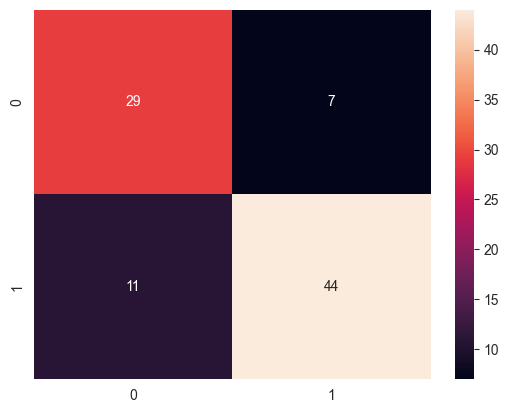

,Train_Acc,Test_Acc,Precision,Recall
"DT4_RSCV(entropy,MD=4,MSS=10)",0.914692,0.802198,0.862745,0.8


In [202]:
ypred_dt4 = dt4.predict(x_test)
dt4_df = tmp(x_train,x_test,y_train,y_test,ypred_dt4,dt4,'DT4_RSCV(entropy,MD=4,MSS=10)')
dt4_df

In [203]:
combined_res = pd.concat([dt1_df,dt2_df,dt3_df,dt4_df])
combined_res

,Train_Acc,Test_Acc,Precision,Recall
DT1(gini),1.000000,0.813187,0.865385,0.818182
"DT2(entropy,MD=6,MSS=15)",0.924171,0.791209,0.860000,0.781818
"DT3_GSCV(entropy,MD=6,MSS=8)",0.924171,0.791209,0.860000,0.781818
"DT4_RSCV(entropy,MD=4,MSS=10)",0.914692,0.802198,0.862745,0.800000
